In [112]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/watch?v=Fb11hWES1BM&t=1s" frameborder="0" allowfullscreen></iframe>')


In [14]:
import numpy as np

# EJERCICIO 1


ejercicio : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

[0. , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1. ]

El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

nota: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy

In [56]:
# tu codigo aqui (~ 5 lineas de codigo):

a =  np.arange(0, 0.6, 0.1)
b =  np.arange(0.51, 0.6, 0.01)
c =  np.arange(0.6, 1, 0.1)

#print(a)
#print(b)
#print(c)
r = np.concatenate([a,b,c])
print(r)




[0.   0.1  0.2  0.3  0.4  0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58
 0.59 0.6  0.7  0.8  0.9 ]


# Ejercicio 2

[0.55919703 0.72065202 5.         ... 0.06591746 0.5646744  0.99056159] [0.55919703 0.72065202 5.         ... 0.06591746 0.5646744  0.99056159]


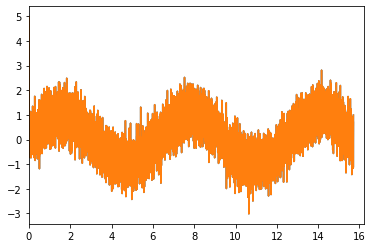

In [80]:
# las siguientes 3 lineas generan un conjunto de datos que se comportan segun una onda senoidal pero tienen
# ruido por lo cual vamos a suavizar usando promedio de 3 puntos
# en este ejercicio los generamos manualmente pero pensemos que son datos que pudieron ser generados con algún
# instrumento como un sensor, o bien estar almacenados en una base de datos
sample_points = 10000
inicio_intervalo = 0
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(inicio_intervalo,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#ys es "y suavizado", inicialmente es una copia de y
ys =  y.copy()

for n in range(1,len(y)-1): #5
    ys[n] = (y[n-1] + y[n] + y[n+1])/3
    
    
    
#print(y)
#print(ys)

#*******************************************************************
ys = y

ys[2] = 5

print(y,ys)


#*******************************************************************

plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(inicio_intervalo,5*np.pi + 0.5)
plt.show()

# RESULTADO

[0.55919703 0.72065202 5.         ... 0.06591746 0.5646744  0.99056159] [5.59197033e-01 1.44130403e+00 1.50000000e+01 ... 6.59042799e+02
 5.64617933e+03 9.90561592e+03]


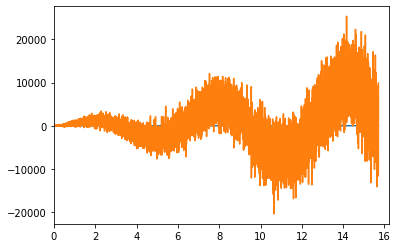

In [108]:
n = np.arange(1,10001)
#v1 = np.dot(y,[n-1])
n_1 = n-1


v_1 = ys*n_1

#print(v_1)

#len(v_1)


n2 = np.arange(1,10001)
#v1 = np.dot(y,[n-1])


v_2 = ys*n2

#print(v_2)

#len(v_2)



n3 = np.arange(1,10001)
#v1 = np.dot(y,[n-1])
n_3 = n3+1

v_3 = ys*n_3

#print(v_3)

resultado = (v_1+v_2+v_3)/3

print(y,resultado)


plt.plot(x,y)
plt.plot(x,resultado)
plt.xlim(inicio_intervalo,5*np.pi + 0.5)
plt.show()


# Ejercicio 3

Ejercicio Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5 , 0.31127812]

Nota: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

S=−∑inP(xi)log2P(xi) 



In [116]:
def calcular_informacion(px):
    return (px)*-np.log2(px) # teoría de la información

distribucion_prob1 = [0.25,0.75]

print(calcular_informacion(distribucion_prob1))

[0.5        0.31127812]


Ejercicio Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

tip investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

# Ejercicio 4

Ejercicio : se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
c(x)=(x2+x+log(0.0001x)−0.54x−−−−−√)/100 

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función ganancia_neta(x,g,c) donde:

x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
g = función que estima la ganancia en función de x
c = función que estima el costo en función de x
La función realiza el calculo simple g(x) - c(x) , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [131]:


def ganancia2(x):
  return np.power(x,2)

def costos(x):
  return np.exp(x)+x+np.log(0.0001*x)+ np.sqrt(0.54*x)


def ganancia_neta(x,g,c):
  return g(x) - c(x)

x_1 = np.random.rand(1)


print(ganancia_neta(x_1,ganancia2,costos))

[7.40497943]


# Ejercicio 5

ejercicio : crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.



In [141]:
def magnitud(x):
    ## tu codigo aqui (~ 1 linea de codigo)
    return np.sum(np.power(x,2)) # raiz cuadrada

errores_modelo1 = np.array([1,2,1,2]) #
errores_modelo2 = np.array([0,1,1,2]) #

print(magnitud(errores_modelo1))
print(magnitud(errores_modelo2))

a_1 = magnitud(errores_modelo1)
b_1 = magnitud(errores_modelo2)


# elegir el mejor modelo con una condicional(if)


if a_1  > b_1 :
    print("El mejor modelo es el modelo 2 con ",b_1, " errores")
else:
    print("El mejor modelo es el modelo 1 con ",a_1, " errores")
    

10
6
El mejor modelo es el modelo 2 con  6  errores


# Ejercicio 6

Ejercicio dado el vector x, usar operadores lógicos sobre vectores y acceso a elementos usando vectores booleanos , escribir un programa que calcule eun nuevo vector z conteniendo el valor absoluto de el vector x.

nota No se puede usar np.abs() ni ciclos

tip usar un vector booleano para saber que elementos son negativos y deben ser multiplicados por -1

In [155]:
def normalizar(x):
    ## tu codigo aqui (~ 1 linea de codigo)
    #return np.sum(np.power(x,2)/np.sqrt(0.54*x)) # raiz cuadrada
    #return x.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
    return x/(np.linalg.norm(x))

print(magnitud(normalizar(errores_modelo1)))
print(normalizar(errores_modelo1))

# elegir el mejor modelo con una condicional(if)


1.0
[0.31622777 0.63245553 0.31622777 0.63245553]


# Ejercicio 7

[-0.03125081  0.29318967  0.16114906]
[0.         3.14159265 6.28318531]
0.14102930586339318


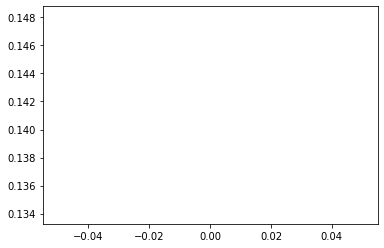

In [163]:
ruido = 0.1*np.random.randn(3) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,2*np.pi,3) 
y = np.sin(x) + ruido

filtro = np.array([1/3,1/3,1/3]) #para lograr las medias moviles a traves de correlacion cruzada

## tu codigo aqui (~ 3 linea de codigo)

#print(ruido)
print(y)
print(x)

producto = np.dot(y,filtro)

print(producto)




